In [41]:
set.seed(42)

In [42]:
require(data.table)

In [43]:
require(tidyverse)

In [44]:
require(featureTweakR)

In [45]:
data(PimaIndiansDiabetes, package="mlbench")

In [46]:
dim(PimaIndiansDiabetes)
levels(PimaIndiansDiabetes$diabetes)
head(PimaIndiansDiabetes)

[1] 768   9

[1] "neg" "pos"

pregnant,glucose,pressure,triceps,insulin,mass,pedigree,age,diabetes
6,148,72,35,0,33.6,0.627,50,pos
1,85,66,29,0,26.6,0.351,31,neg
8,183,64,0,0,23.3,0.672,32,pos
1,89,66,23,94,28.1,0.167,21,neg
0,137,40,35,168,43.1,2.288,33,pos
5,116,74,0,0,25.6,0.201,30,neg


In [47]:
setnames(PimaIndiansDiabetes, old = c("pregnant", "glucose", "pressure", "triceps", "insulin", "mass", "pedigree", "age"),
         new = c('PREGNANCY', 'GLUCOSE', 'BLOOD_PRESSURE', 'SKIN_THICKNESS', 'INSULIN', 'BMI', 'DIABETES_PEDIGREE_FUNCTION', 'AGE'))

In [48]:
summary(PimaIndiansDiabetes)

   PREGNANCY         GLUCOSE      BLOOD_PRESSURE   SKIN_THICKNESS 
 Min.   : 0.000   Min.   :  0.0   Min.   :  0.00   Min.   : 0.00  
 1st Qu.: 1.000   1st Qu.: 99.0   1st Qu.: 62.00   1st Qu.: 0.00  
 Median : 3.000   Median :117.0   Median : 72.00   Median :23.00  
 Mean   : 3.845   Mean   :120.9   Mean   : 69.11   Mean   :20.54  
 3rd Qu.: 6.000   3rd Qu.:140.2   3rd Qu.: 80.00   3rd Qu.:32.00  
 Max.   :17.000   Max.   :199.0   Max.   :122.00   Max.   :99.00  
    INSULIN           BMI        DIABETES_PEDIGREE_FUNCTION      AGE       
 Min.   :  0.0   Min.   : 0.00   Min.   :0.0780             Min.   :21.00  
 1st Qu.:  0.0   1st Qu.:27.30   1st Qu.:0.2437             1st Qu.:24.00  
 Median : 30.5   Median :32.00   Median :0.3725             Median :29.00  
 Mean   : 79.8   Mean   :31.99   Mean   :0.4719             Mean   :33.24  
 3rd Qu.:127.2   3rd Qu.:36.60   3rd Qu.:0.6262             3rd Qu.:41.00  
 Max.   :846.0   Max.   :67.10   Max.   :2.4200             Max.   :81.00  

In [69]:
dataset <- sample_frac(PimaIndiansDiabetes) %>% dataSplit(test.ratio = 0.15)

[Split data] train : test = 653 : 115 obs. (9 colmns)


In [70]:
#features <- c('PREGNANCY', 'GLUCOSE', 'BLOOD_PRESSURE', 'SKIN_THICKNESS', 'INSULIN', 'BMI', 'DIABETES_PEDIGREE_FUNCTION', 'AGE')
features <- c('GLUCOSE', 'BLOOD_PRESSURE', 'SKIN_THICKNESS', 'INSULIN', 'BMI')

In [71]:
data.train <- dataset$train %>% select(features)
true.y     <- dataset$train[ ,ncol(dataset$train)]
data.test  <- dataset$test  %>% select(features) %>% head(100)

In [72]:
es <- learnModel(X.train = data.train, true.y = true.y, ntree = 100)


Call:
 randomForest(x = train.scaled, y = true.y, ntree = ntree) 
               Type of random forest: classification
                     Number of trees: 100
No. of variables tried at each split: 2

        OOB estimate of  error rate: 27.87%
Confusion matrix:
    neg pos class.error
neg 346  72   0.1722488
pos 110 125   0.4680851

extracting all (100 of 100 trees)
Time difference of 39.93406 secs
set e-satisfactory instance (100 trees)
Time difference of 11.94647 secs


In [73]:
ft <- predict(es, newdata = data.test, label.from = "pos", label.to = "neg")

76 instances were predicted by 100 trees: 

neg pos 
 48  28 
Time difference of 1.2529 mins


[1] "direction"
        variable         mean       median
1 BLOOD_PRESSURE -0.042991840 -0.042991840
2            BMI -0.067375393 -0.067375393
3        GLUCOSE -0.222829873 -0.222829873
4        INSULIN  0.007864908  0.007864908
5 SKIN_THICKNESS  0.039236859  0.039236859


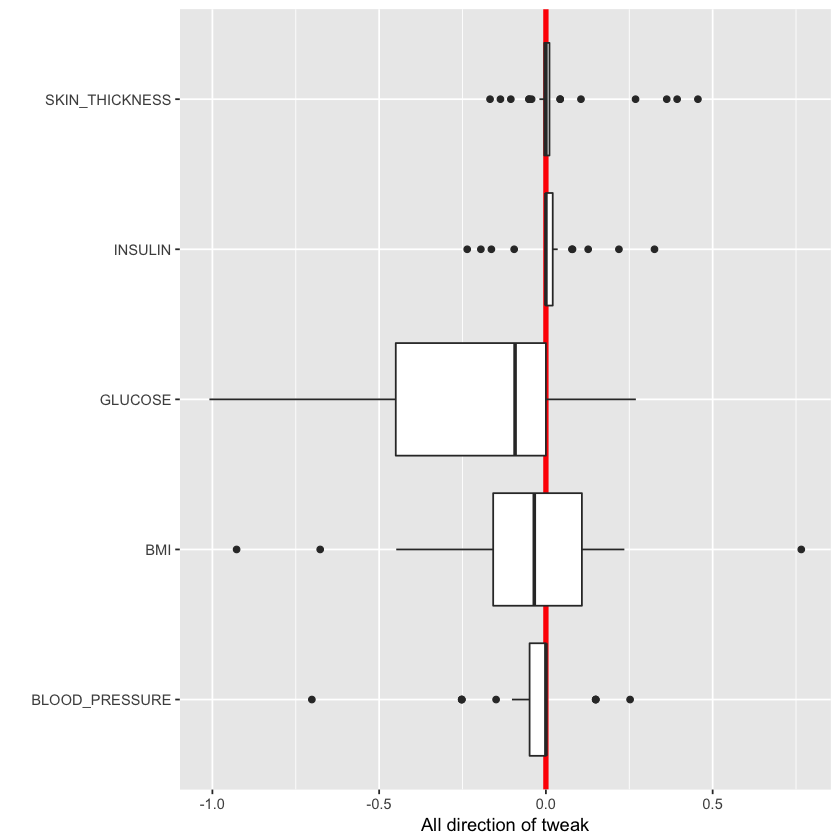

In [74]:
plot(ft, type = "direction")

instance #12
                         key       value
1             BLOOD_PRESSURE  0.00000000
2                        BMI -0.44538599
3 DIABETES_PEDIGREE_FUNCTION  0.05093173
4                    GLUCOSE  0.09754945
5                    INSULIN  0.00000000
6                  PREGNANCY -0.44686474
7             SKIN_THICKNESS -0.14349259


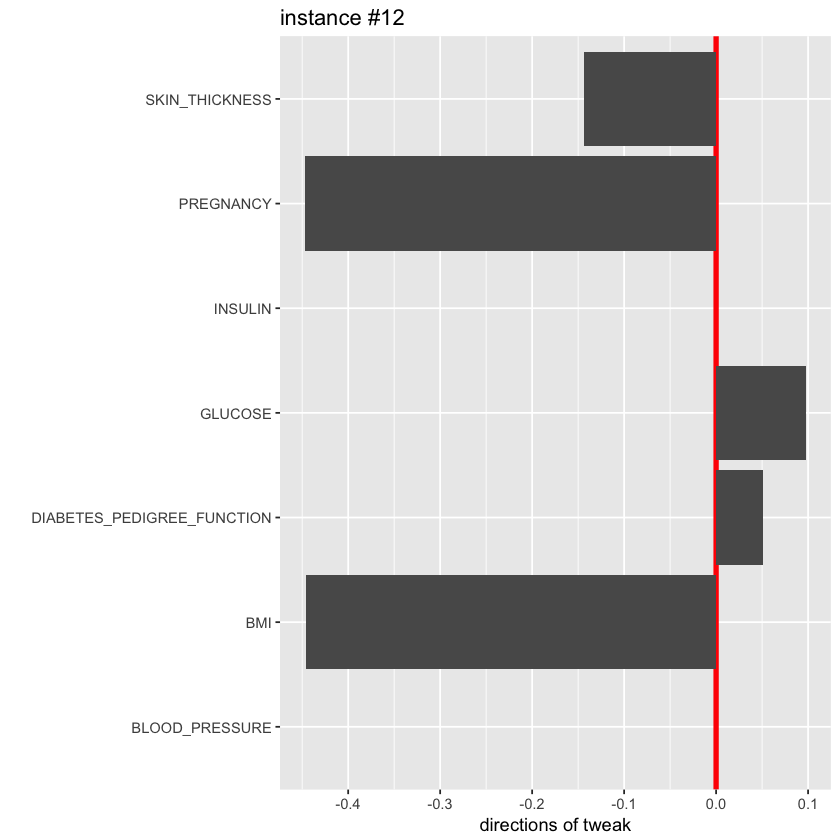

In [26]:
plot(ft, k=12)

In [ ]:
plot(ft, k=36)

In [ ]:
data(spam, package = "kernlab")

In [ ]:
dim(spam)
levels(spam$type)
head(spam)

In [ ]:
dataset <- sample_frac(spam) %>% dataSplit(test.ratio = 0.1)

In [ ]:
important.var <- c("charExclamation", "charDollar", "remove", "free", "capitalAve", "capitalLong", "your", "hp")

In [ ]:
data.train <- dataset$train %>% select(important.var)
true.y     <- dataset$train[ ,ncol(dataset$train)]
data.test  <- dataset$test  %>% select(important.var) %>% head(50)

In [ ]:
es <- learnModel(X.train = data.train, true.y = true.y, ntree = 22)

In [ ]:
ft <- predict(es, newdata = data.test, label.from = "spam", label.to = "nonspam")

In [ ]:
plot(ft, type = "direction")

In [ ]:
plot(ft, k=4)

In [ ]:
plot(ft, k=11)